In [24]:
# necessary libraries

# %pylab inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# read data to DataFrame
import pandas as pd
import numpy as np

# feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tokenize.casual import casual_tokenize
from nltk.corpus import stopwords

# pipeline
from sklearn.pipeline import Pipeline

# model selection
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score,  classification_report, confusion_matrix, make_scorer
from sklearn.base import BaseEstimator, TransformerMixin

# decomposition PCA
from sklearn.decomposition import IncrementalPCA, TruncatedSVD
from sklearn.decomposition import NMF, LatentDirichletAllocation

# classifiers
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

#learning
from sklearn.model_selection import learning_curve

# time
from time import time

# progress bar
from tqdm import tqdm

# string
import string

In [25]:
n_top_words = 10
n_components = 70

In [26]:
# load data
PATH_TO_DATA = './simplesentiment/'
files = ['products_sentiment_train.tsv', 'products_sentiment_test.tsv']
train =  pd.read_csv(PATH_TO_DATA+files[0], sep = '\t', header = None, names = ['text', 'target'])
# train, taget, test
data_samples = train.text
y = train.target

## LDiA model

### vectorizer

In [32]:
punctuation = set(f"{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’`")

# data transformer - vectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1),
                             min_df=2,
                             tokenizer=casual_tokenize,
                             analyzer='word',
                             stop_words=set(stopwords.words('english'))
                             | punctuation)

In [28]:
LDiA = LatentDirichletAllocation(n_components=n_components,
                                 max_iter=10,
                                 learning_method='online',
                                 learning_offset=50.,
                                 random_state=0,
                                 n_jobs=-1)

ldia = Pipeline(steps=[('vectorizer', vectorizer), ('ldia', LDiA)])

print("Fitting LDiA model with term counts features ...")
t0 = time()
Xt = ldia.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

Fitting LDiA model with term counts features ...
done in 11.729s.


In [29]:
display(Xt[1])
print(Xt.shape)

array([0.00348737, 0.00348737, 0.00348737, 0.00348737, 0.00348737,
       0.00348737, 0.00348737, 0.00348737, 0.00348737, 0.00348737,
       0.00348737, 0.00348737, 0.00348737, 0.00348737, 0.00348737,
       0.00348737, 0.00348737, 0.00348737, 0.00348737, 0.00348737,
       0.00348737, 0.00348737, 0.00348737, 0.00348737, 0.00348737,
       0.00348737, 0.00348737, 0.00348737, 0.00348737, 0.00348737,
       0.00348737, 0.00348737, 0.00348737, 0.00348737, 0.00348737,
       0.00348737, 0.00348737, 0.00348737, 0.00348737, 0.00348737,
       0.00348737, 0.00348737, 0.00348737, 0.00348737, 0.00348737,
       0.00348737, 0.00348737, 0.00348737, 0.00348737, 0.00348737,
       0.00348737, 0.00348737, 0.00348737, 0.00348737, 0.00348737,
       0.75937169, 0.00348737, 0.00348737, 0.00348737, 0.00348737,
       0.00348737, 0.00348737, 0.00348737, 0.00348737, 0.00348737,
       0.00348737, 0.00348737, 0.00348737, 0.00348737, 0.00348737])

(2000, 70)


In [30]:
def print_top_words(model, feature_names, n_top_words, n):
    for topic_idx, topic in enumerate(model.components_[:n]):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

## Components in LDiA

In [31]:
print("\nTopics in LDA model:")
feature_names = vectorizer.get_feature_names()
print_top_words(LDiA, feature_names, n_top_words, 10)


Topics in LDA model:
Topic #0: phone speakerphone small recommend pocket highly owned light fits nokia
Topic #1: replaced works better much router four symbian function instructions hangs
Topic #2: technologies capabilities room always new xtra 40gb many yesterday extremely
Topic #3: wrt configure want business home media 54g equalizer wav ended
Topic #4: tool enjoyed powershot powerful shooting sd500 really canon plays jpegs
Topic #5: diaper minimal based best pail devices far pause champ albums
Topic #6: hangs reset file transfer every player ratio issues headphones everything
Topic #7: beautiful sucks counting menus high-quality competitors stores far apps beatiful
Topic #8: t-mobile highs deeper rebate rebates terms dont machine worth like
Topic #9: option learning first online daughter love ringtone casing little exceptional



# PLots

## 2-D

Plotting 2D LDiA model with term counts features ...
done in 4.993s.


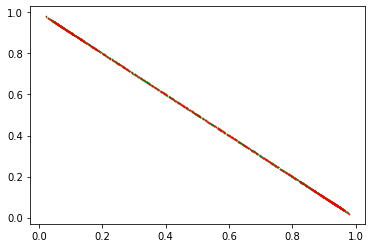

In [13]:
n_components = 2

LDiA = LatentDirichletAllocation(n_components=n_components,
                                 max_iter=10,
                                 learning_method='online',
                                 learning_offset=50.,
                                 random_state=0,
                                 n_jobs=-1)

ldia = Pipeline(steps=[('vectorizer', vectorizer), ('ldia', LDiA)])

print("Plotting 2D LDiA model with term counts features ...")
t0 = time()
Xt = ldia.fit_transform(data_samples)


def d2_plot(Xt, y):
    positive = Xt[y == 1]
    negative = Xt[y == 0]
    plt.scatter(positive[:, 1], positive[:, 0], color='green', s=0.2)
    plt.scatter(negative[:, 1], negative[:, 0], color='red', s=0.2)


d2_plot(Xt, y)

print("done in %0.3fs." % (time() - t0))

## 3-D

Plotting 3D LDiA model with term counts features ...
done in 5.326s.


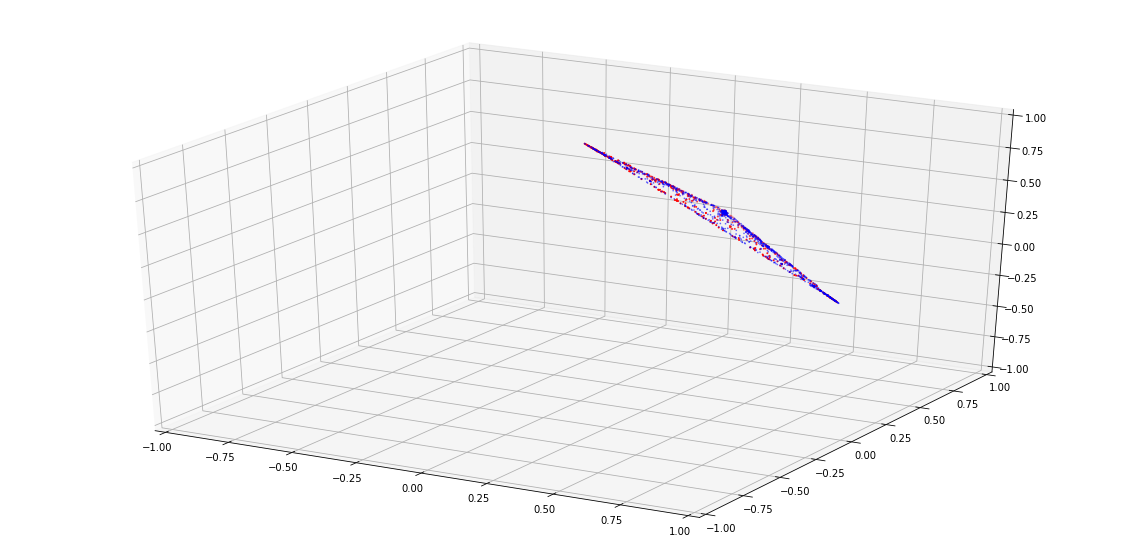

In [14]:
n_components = 3

LDiA = LatentDirichletAllocation(n_components=n_components,
                                 max_iter=10,
                                 learning_method='online',
                                 learning_offset=50.,
                                 random_state=0,
                                 n_jobs=-1)

ldia = Pipeline(steps=[('vectorizer', vectorizer), ('ldia', LDiA)])

print("Plotting 3D LDiA model with term counts features ...")
t0 = time()
Xt = ldia.fit_transform(data_samples)


def d3_plot(Xt, y):
    positive = Xt[y == 1]
    negative = Xt[y == 0]
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(positive[:, 0],
               positive[:, 1],
               positive[:, 2],
               color='blue',
               s=0.5,
               alpha=0.5)
    ax.scatter(negative[:, 0],
               negative[:, 1],
               negative[:, 2],
               color='red',
               s=1)
    plt.xlim((-1, 1))
    plt.ylim((-1, 1))
    ax.set_zlim(-1, 1)


d3_plot(Xt, y)
print("done in %0.3fs." % (time() - t0))

## Classifiers

In [19]:
# split data
def split_data(X, y, rs):
    test_portion = 0.33
    return train_test_split(X,
                            y,
                            test_size=test_portion,
                            random_state=int(rs),
                            shuffle=True,
                            stratify=y)


# data transformation
def transform_data(train, validation, t):
    t.fit(train)
    return t.transform(train), t.transform(validation)

In [20]:
from sklearn.svm import SVC

# classifier = SVC(kernel = 'rbf', random_state=3, class_weight='balanced', probability = True)
r_seed = 15

In [21]:
from sklearn.naive_bayes import ComplementNB
classifier = ComplementNB()

### Search opt. n_components

100%|██████████| 70/70 [03:14<00:00,  2.78s/it]


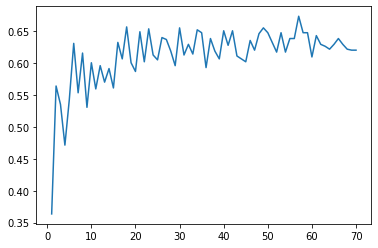

In [22]:
# split data to train/validation sets
X_train, X_validation, y_train, y_val = split_data(data_samples, y, r_seed)

scores = []
lim = 70
n_range = np.linspace(1, lim, lim).astype(int)
scorer = accuracy_score
# scorer = roc_auc_score

for n in tqdm(n_range):
    # decompositor
    LDiA = LatentDirichletAllocation(n_components=n,
                                     max_iter=5,
                                     learning_method='online',
                                     learning_offset=10.,
                                     random_state=0,
                                     n_jobs=-1)
    # transformer
    pipe = Pipeline(steps=[('vectorizer',
                            vectorizer), ('decomposition',
                                          LDiA), ('classifier', classifier)])
    # fit classifier with train data
    pipe.fit(X_train, y_train)
    # get predictions as probabilities [0..1]
    prob_scores = pipe.predict_proba(X_validation)[:, 1]
    score = scorer(y_val, (prob_scores>0.5).astype(int))
    scores.append(score)

plt.plot(n_range, scores)

In [23]:
np.mean(scores), np.std(scores)

(0.6116666666666666, 0.045871357344599795)